<h1 style="color:Green;">Week 1 Lab - due by 10th July, 2022 (11:59 pm CDT )</h1> 

## By Shyam Parikh

<a style="color:purple;" href="https://docs.google.com/presentation/d/19UcHoIW3OC2Fd18_VkooiumdG5NtQpu-RoCgfz_I4nM/edit#slide=id.g11b032e97d3_0_0">[Week 1 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to perform Exploratory Data Analysis (EDA) on a multiple-asset portfolio</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr

Months following the COVID-19 pandemic recovery, the stock market seems to slow down on its ralley and the cryptocurrency market continues to show volatility. As a quantitative analyst and an investor, you want to understand the empirical behaviors of the assets before building a predictive model and investing in them, since you believe that this can give you a statistical edge in your portfolio. You have several assets in mind and would like to conduct an initial analysis on their historical performances to see if they are a good makeup for your portfolio.<br><br>
Please complete the following problems to perform full EDA on your stock selection.

<h2 style="color:Green;">Problem 1: Preliminary Visualization</h2>

a) Select 3-5 assets of your prefernce, then specify their ticker(s), start and end dates of their price data you want to explore.<br><br>
Notice that any assets can be selected, and not just stocks. For example, cryptocurrency and foreign exchange instruments can be suggested as well. Some relatively new cryptocurrencies (e.g., Solana, USD Coin) only have complete data dating back to three or four years ago, so setting the duration of data further back than these dates may result in inaccurate representation of their relationships.

In [31]:
################ EDIT CODE LINES HERE #################

symbolList =  ["AAPL","LAZR","SOL-USD","MSFT","WBA"] # asset ticker symbols 
START_DATE = '2021-04-01' # asset data start date 
END_DATE = '2022-06-01' # asset data end date

#####################################################

Run the following code chunk to extract the adjusted close prices and compute log returns of Apple's stock from Yahoo Finance.<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [32]:
stockPxList = pdr.DataReader(symbolList , 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
stockLogRetList = np.log(stockPxList).diff().dropna()


b) Please write a code piece to perform 2 visualizaitons on the assets' log returns you extracted from a). <br><br>
Since there are at least 3 assets, plots such as time plot, scatter plot, box plot, and histogram would have to be plotted more than once to evaluate each asset.

Visualization #1: 

Text(0.5, 1.0, 'Correlations Between Stock and Cryptocurrency Log Return')

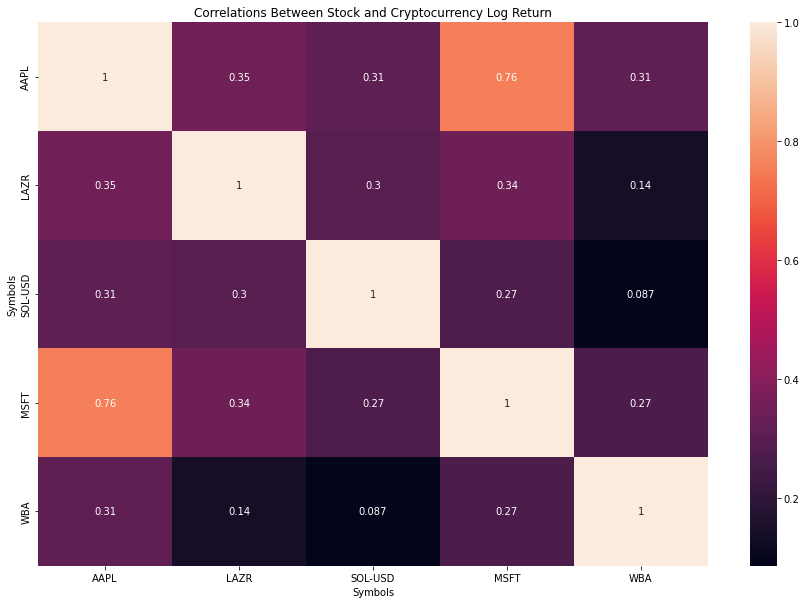

In [33]:
################ EDIT CODE LINES HERE #################
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(stockLogRetList.corr(),annot=True)
plt.title("Correlations Between Stock and Cryptocurrency Log Return")
#####################################################

Visualization #2:

count    232.000000
mean       0.000752
std        0.017495
min       -0.058073
25%       -0.009271
50%        0.001064
75%        0.012533
max        0.067451
Name: AAPL, dtype: float64


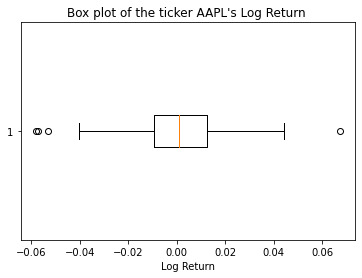

count    232.000000
mean      -0.002935
std        0.047073
min       -0.125233
25%       -0.030466
50%       -0.007461
75%        0.022055
max        0.165866
Name: LAZR, dtype: float64


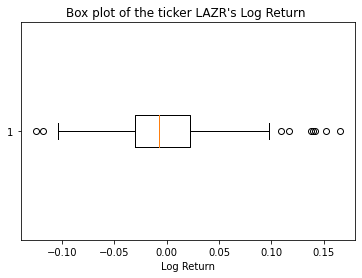

count    232.000000
mean       0.001232
std        0.077317
min       -0.465355
25%       -0.042157
50%        0.001321
75%        0.048121
max        0.242524
Name: SOL-USD, dtype: float64


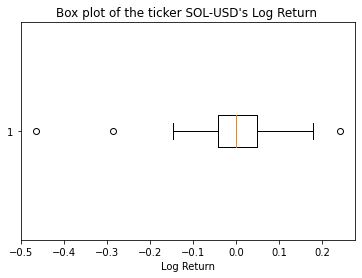

count    232.000000
mean       0.000808
std        0.016754
min       -0.046599
25%       -0.006805
50%        0.001145
75%        0.011424
max        0.049831
Name: MSFT, dtype: float64


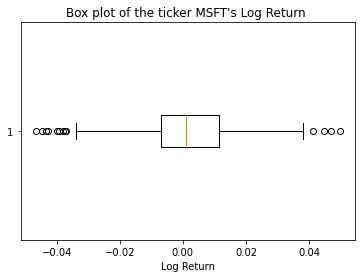

count    232.000000
mean      -0.000954
std        0.017743
min       -0.087618
25%       -0.009961
50%       -0.000316
75%        0.008991
max        0.071641
Name: WBA, dtype: float64


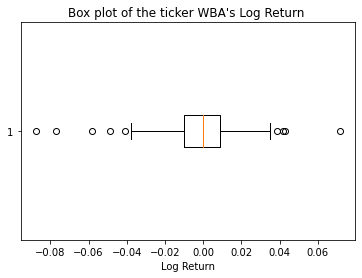

In [34]:
#Box Plot
################ EDIT CODE LINES HERE #################
outlierList = []
IQRList = []
rangeList = []
stockList = []
for z in range(len(symbolList)):
    stockList.append(list(stockLogRetList[symbolList[z]]))
    #Calculating the Interquartile Range
    rangeList.append(stockLogRetList[symbolList[z]].quantile(1)-stockLogRetList[symbolList[z]].quantile(0))
    currIQR = stockLogRetList[symbolList[z]].quantile(0.75)-stockLogRetList[symbolList[z]].quantile(0.25)
    IQRList.append(currIQR)
    lowerBound = stockLogRetList[symbolList[z]].quantile(0.25) - 1.5 * currIQR
    upperBound = stockLogRetList[symbolList[z]].quantile(0.75) + 1.5 * currIQR
    newArr = []
    outlierList.append(newArr)
    for x in range(len(stockList[z])):
        if(stockList[z][x] < lowerBound or stockList[z][x] > upperBound):
            outlierList[z].append(stockList[z][x])
    print(stockLogRetList[symbolList[z]].describe())
    plt.boxplot(stockList[z], vert=False) # stock log returns are extracted above when visualizing time plots
    plt.title(label = ("Box plot of the ticker " + symbolList[z]+ "'s Log Return ") )
    plt.xlabel("Log Return")
    plt.show()
#######################################################

c) Interpret the visualizations that you performed above. What can you say about them?

Visualization 1:

Through Visualization 1, I visualized a correlation heatmap that interprets the correlation of the log returns of multiple financial assets that are being analyzed. All of the pairs of financial assets have positive correlation which means that the correlation value is greater than 0. This heatmap is able to show that Microsoft and Apple have the highest correlation of log returns among the group of stocks, whereas the cryptocurrency Solana and Walgreens have the lowest correlation of log returns. Microsoft and Apple are very similar stocks to one another as they are stable large cap companies whom are both in the technology sector. Since they share a very high positive correlation, we know that if Apple stock drops, Microsoft Stock is also likely to drop. It is suggested to hold only one of the two stocks to avoid both of them dropping at the same time. Solana and Walgreens are quite opposite of one another. Walgreens and Solana are completely different from one another as Solana is a cryptocurrency and Walgreens is in the pharmaceutical sector. There is a very weak positive correlation between Walgreens and Solana. Walgreens and Solana would be good hedge pair with one another as their correlation value of 0.087 is very close to 0.  Through the correlation heatmap, I can say that most of these stocks other than Microsoft and Apple have weak correlations with one another as all pairs except one have a correlation value of less than 0.4 which is very weak. Through the correlation heatmap, we can tell that if a pair of stocks are highly correlated with one another, it is much safer to hold one out of the two pairs of stocks. Also, through the heatmap, we are able to find good hedging pairs if a stock's correlation is close to 0. 

Visualization 2: 

Through Visualization 2, I visualized 5 different boxplots that interpret the log returns of 5 different financial assets. 

Analysis of Apple Stock - Apple's average daily log return is  0.11%. The Range of Apple Stock's log returns was 12.55%. The Interquartile Range is equal to 2.18%. There are four potential outliers in Apple's daily log return at 6.75%,   -5.73% , -5.32% , -5.81%. 

Analysis of Luminar Technologies Stock - Luminar Technologies Stock has an average daily log return of -0.75%. The Range of Luminar Technologies's log returns was 29.11%. The Interquartile Range is equal to 5.25%. There are 9 potential outliers in Luminar's daily log return at 14.16%,16.59%,11.67%, 13.78%,13.95%,10.91%, -11.88%, 15.19%, and -12.52%

Analysis of Solana Coin - Solana has an average daily log return of 0.13%. The Range of Solana's log return range was very large as it was 70.79%. The Interquartile Range is equal to 9.02%. Since the Interquartile Range is quite high, we can tell that Solana was an extremely volatile stock as there was a large difference between the 1st and 3rd Quartile. There are 3 potential outliers in the cryptocurrency Solana's average daily log returns at -46.54%, 24.25%, and -28.50%. These are absurd outliers that really affected the asset price of Solana. 

Analysis of Microsoft Stock - Microsoft has an average daily log return of 0.11% which is approximately the same as Apple's. Microsoft has a relatively small log return range of 9.64%. The Interquartile Range is equal to 1.82%.  Since, the Interquartile Range is quite small as compared to the rest of our financial assets, we can say that Microsoft is a relatively stable and less volatile financial asset. There are 13 potential outliers in Microsoft's daily log returns. These values include a log percent change of -3.69%, 4.13%, -3.91%, 4.98%, 4.48%, -3.73%, -3.81%,4.70%, -4.27%, -4.45%, and -4.66%. 

Analaysis of Walgreens Boots Alliance Stock - The average daily log return of Walgreens is -0.03%. Walgreens has a log return range of 15.93%. The Interquartile Range is equal to 1.90%. There are 9 potential outliers in Walgreens daily log returns. These percent changes include -4.11%, -7.70%, 4.27%, 3.86%, 7.16%, 4.19%, -5.83%, -4.90%, -8.76%. 



<h2 style="color:Green;">Problem 2: Preliminary Normality Testing</h2>

You realized that within the date range you specified, there may be some days when the assets make big directional swings, hence skewing the data or thickening the probabilities of extreme values. To keep your minds in peace, you decided to perform normality testing to understand how your assets' distribution compare to what's condered 'normal'.<br><br>
(e.g., If your date range spans the COVID-19 pandemic, you may see more extreme tail values or outliers in your log returns, which deviates from a normal distribution because the market fluctuates a lot during this time.)<br><br>
a) Please write a code piece to perform 1 normality test on the assets' returns you extracted from problem 1.

In [35]:
################ EDIT CODE LINES HERE #################
#Shapiro-Wilk Test
pVals = []
for x in range(len(symbolList)):
    shapiro_test = stats.shapiro(stockList[x])
    pVals.append(shapiro_test.pvalue)
pVals

#####################################################

[0.011002874001860619,
 7.514167373301461e-05,
 6.427960386190534e-08,
 0.0017058314988389611,
 5.0637172677170383e-08]

b) Interpret the result you obtained from the normality test you chose in part a). What can you say about it?

Normality Test for Apple - 

H0 = Log Return Samples Come from a Normal Distribution.

H1 = Log Return Samples Come from a Non-Normal Distribution. 

We are performing a Shapiro-Wilk Test to measure for normality. 
For Apple's Stock's log returns, the test returns a probability value of 1.100% which is smaller than the benchmark value of 0.05%, We can reject the null hypothesis and can conclude that AAPL's daily log return comes from a non-normal distribution. Our sample size is quite large as there were 232 days of data that were taken. Due to this, it is very likely that the test of normality will be rejected. 

Normality Test for Luminar - 

H0 = Log Return Samples Come from a Normal Distribution.

H1 = Log Return Samples Come from a Non-Normal Distribution. 

We are performing a Shapiro-Wilk Test to measure for normality. 
For Luminar Technologies's stock's log returns, the test returns a probability value of 7.514 *10 ^-5 which is smaller than the alpha value of 0.05%. We can reject the null hypothesis and can conclude that LAZR's daily log return comes from a non-normal distribution. Our sample size is quite large as there were 232 days of data that were taken. Due to this, it is very likely that the test of normality will be rejected. 

Normality Test for Solana - 

H0 = Log Return Samples Come from a Normal Distribution.

H1 = Log Return Samples Come from a Non-Normal Distribution. 

We are performing a Shapiro-Wilk Test to measure for normality. 
For Solana's cryptocurrency's log returns, the test returns a probability value of 6.428 *10 ^-8 which is smaller than the alpha value of 0.05%. We can reject the null hypothesis and can conclude that SOL-USD's daily log return comes from a non-normal distribution. Our sample size is quite large as there were 232 days of data that were taken. Due to this, it is very likely that the test of normality will be rejected. 

Normality Test for Microsoft - 

H0 = Log Return Samples Come from a Normal Distribution.

H1 = Log Return Samples Come from a Non-Normal Distribution. 

We are performing a Shapiro-Wilk Test to measure for normality. 
For Microsoft's Stock's log returns, the test returns a probability value of 0.171 which is smaller than the benchmark value of 0.05%. We can reject the null hypothesis and can conclude that MSFT's daily log return comes from a non-normal distribution. Our sample size is quite large as there were 232 days of data that were taken. Due to this, it is very likely that the test of normality will be rejected. 

Normality Test for Walgreens - 

H0 = Log Return Samples Come from a Normal Distribution.

H1 = Log Return Samples Come from a Non-Normal Distribution. 

We are performing a Shapiro-Wilk Test to measure for normality. 
For Walgreens's Stock's log returns, the test returns a probability value of 5.064 * 10 ^-8 which is smaller than the benchmark value of 0.05%. We can reject the null hypothesis and can conclude that WBA's daily log return comes from a non-normal distribution. Our sample size is quite large as there were 232 days of data that were taken. Due to this, it is very likely that the test of normality will be rejected. 

<h2 style="color:Green;">Problem 3: Preliminary Pre-processing </h2>

Imbalanced labels is a classification predictive modeling problem where the distribution of examples across the classes is not equal. For example, we may collect measurements of cats and have 80 samples of one cat species and 20 samples of a second cat species. This represents an example of an imbalanced classification problem. A 50-50 or a near-50-50 sample species would form a balanced classification problem.<br/>

As a quantitative analyst, you are curious as to how the list of assets you chose above helps predict the direction of another asset. But before diving into the modeling portion, you want to investigate any label imbalance problems. <br>

Please read this blog before jumping into this question: https://machinelearningmastery.com/what-is-imbalanced-classification/

a) Specify the ticker of the asset whose direction you are interested in predicting. This stock shall be different than the ones you chose in problem 1.

In [36]:
SYMBOL = 'BABA' # asset ticker symbol

Run the following code chunk. This will binarize the returns for the asset that you're trying to predict over the period specified above. In other words, the asset's price will be transformed into 0's and 1's - 0 if price did not go up, 1 if price went up. A bar plot is produced to show the label distribution. For instance, there should be one bar showing how many days the stock goes up and another showing how many days the stock goes down.<br/>

<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

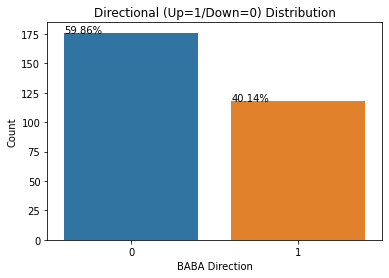

In [37]:
FEATURES = symbolList.copy()
stockPx = pdr.get_data_yahoo(SYMBOL, START_DATE, END_DATE)['Adj Close'] # storing adjusted stock prices into a variable 
stockPx01 = (stockPx.pct_change().dropna() > 0).astype(int)
# visualize directional label distribution
ax = sns.countplot(x = stockPx01)
plt.title('Directional (Up=1/Down=0) Distribution')
plt.xlabel(SYMBOL + ' Direction')
plt.ylabel('Count')
total = len(stockPx01)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

In [38]:
#stockLogRetList.info()
#stockPx.info()
#The two different lists aren't the same size so I have to adjust it so that they are the same length. This is likely because of Solana-USD. 
stockLogRetList[SYMBOL] = stockPx
stockLogRetList.dropna()
stockLogRetList.info()
stockPx = stockLogRetList[SYMBOL]
stockLogRetList = stockLogRetList.drop("2021-04-06")
stockPx01 = (stockPx.pct_change().dropna() > 0).astype(int)
stockLogRetList = stockLogRetList.drop(SYMBOL,axis = 1)
stockLogRetList = scale(stockLogRetList)
stockLogRetList
#I was able to adjust the list so that they became the same size. 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2021-04-06 to 2022-06-01
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AAPL     232 non-null    float64
 1   LAZR     232 non-null    float64
 2   SOL-USD  232 non-null    float64
 3   MSFT     232 non-null    float64
 4   WBA      232 non-null    float64
 5   BABA     232 non-null    float64
dtypes: float64(6)
memory usage: 12.7 KB


array([[ 0.71776039, -2.14764048,  0.75553394,  0.43963213, -0.0724831 ],
       [ 1.04641137, -0.38555837,  0.2579525 ,  0.74528356, -0.75942461],
       [ 1.10347161, -0.36570284,  0.3406907 ,  0.5600893 , -0.58315629],
       ...,
       [ 1.26838972,  0.69988322, -1.28555101,  0.71404336,  0.81586698],
       [ 2.24090248,  1.00563771, -0.78207578,  1.57595993,  0.92204808],
       [-0.09251183, -1.12056006, -1.67069848,  0.07094206, -0.69018204]])

b) Are the labels balanced or imbalanced? Why?<br/>

The labels are slightly imbalanced in this scenario as the proportions are 40.14 and 59.86 which is approximately a 4:6 ratio. If a label was to be balanced, there would be a 50-50 chance for Alibaba's direction to go up or down. In this scenario, there is no unevenness and would form a well-balanced classification problem. This is not a severe imbalance(like a 1:5 ratio) as there is minimal bias involved. The bias in this scenario is towards the down direction. There is some skewness, but not a detrimental amount.  

c) How do you think they can affect our prediction? (Hint: think about what the training data will look like)

An imbalance in labels can lead to bias toward the majority class. In this example, there is a small bias suggesting that Alibaba's stock will go down. Based on the 5 financial asset tickers, the trend suggests that the stock has a 59.86% chance to go down. The training data will likely indicate that BABA's stock will have negative returns since the overall trend is leeaning towards a downward trend. 

d) Please suggest one way to handle imbalanced data?

One way we can handle imbalanced data is by Synthetic Minority Over-Sampling Technique(SMOTE) and undersampling. Through this method, we upsample the minority class by finding the k nearest neighbors for the minority class which has a default value of k = 5. Once you upsample the minority class, you should undersample the majority class by randomly removing samples from the class. This way of handling imbalanced data is very effective as new samples from the minority class are created and are mreasonable values.  

e) What is are the features in this problem? 

In this problem, the features are the different tickers of the financial assets. In my scenario, the features are AAPL, LAZR, SOL-USD, MSFT, and WBA. 

f) Please write a one-line code to split the data into 80% training set and 20% testing set.

In [39]:
################ EDIT CODE LINES HERE #################
X_train, X_test, y_train, y_test = train_test_split(stockLogRetList,stockPx01,test_size=0.2, random_state=0)
#####################################################

g) Please write a code piece to visualize the feature importance ranking of with a bar plot. How are the features ranked by their importance scores?<br><br> 
(Hint: you would need to split the data first in part e) before computing the importance scores here)

array([0.17435952, 0.29912839, 0.15549175, 0.18295189, 0.18806845])

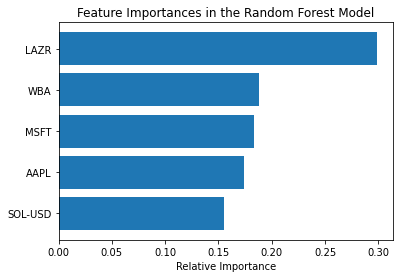

In [40]:
################ EDIT CODE LINES HERE #################

from sklearn.ensemble import RandomForestRegressor # importing the random forest module

rf_model = RandomForestRegressor(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores

newList = FEATURES
newList.append(SYMBOL)
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [newList[i] for i in indices])
plt.xlabel('Relative Importance')
importances
#####################################################

The features are ranked by their relative importance on how they affect the overall direction that Alibaba stock is headed. Luminar Technologies has the strongest importance on the direction that BABA stock is headed at 29.91% whereas Solana has the least impact with a feature importance percentage of 15.55%. 